In [1]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
feature_name = "flipper_length_mm"
target_name = "body_mass_g"

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
a = penguins.loc[:,[feature_name,target_name]].dropna()
data,target = a[[feature_name]], a[target_name]

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(data,target)

LinearRegression()

In [16]:
# the instance linear_regression stores the parameter values in the attributes coef_ and intercept_


In [21]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.685566406100094

In [23]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077065

In [24]:
import numpy as np
flipper_length_range = np.linspace(data.min(),data.max(),num=300)
predicted_body_mass =(weight_flipper_length*flipper_length_range+ intercept_body_mass)

Text(0.5, 1.0, 'Modedl using LinearRegression from scikit learn')

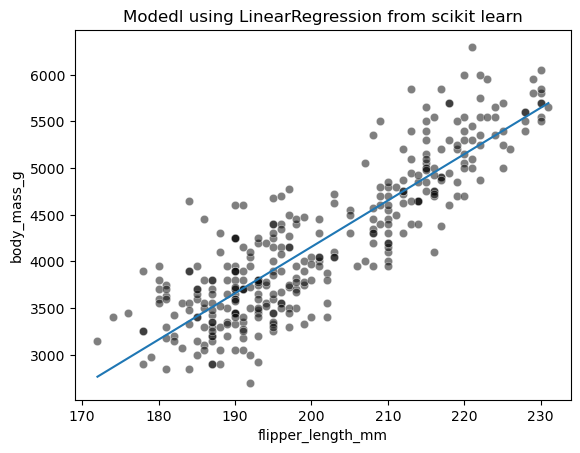

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=a,color='black',alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
plt.title('Modedl using LinearRegression from scikit learn')

In [29]:
# mean squared error
from sklearn.metrics import mean_squared_error
inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target,inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


In [30]:
## mean ansolute error , it gives the better model as it tells the difference in the weight 


In [31]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target,inferred_body_mass)
print(f"The mean absolute error of the optimam model is {model_error:.2f}g")

The mean absolute error of the optimam model is 313.00g


In [ ]:
# it means our model is making the error of 313g while telling the body mass of the penguin